<a href="https://colab.research.google.com/github/joaoSouza2121/machine-learning/blob/main/Aprendizado_Nao_Supervisionado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font color="blue">Machine Learning</font>

Algoritmo - K-means

In [1]:
# Imports
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [2]:
# Carregando a base de dados
iris = datasets.load_iris()
# visualização de quantos registros existem por classe
unicos, quantidade = np.unique(iris.target, return_counts=True)
unicos
                               

array([0, 1, 2])

In [3]:
quantidade

array([50, 50, 50])

Agrupamento com K-Means utilizando 3 clusteres de acordo com a base de dados

In [5]:
cluster = KMeans(n_clusters= 3)
cluster.fit(iris.data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Visualização dos tres centroids


In [6]:
centroids = cluster.cluster_centers_
centroids

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

Visualização dos grupos que cada registro foi associado

In [11]:
previsoes = cluster.labels_
#previsoes

Contagem dos registros por classe

In [8]:
unicos2, quantidade2 = np.unique(previsoes, return_counts=True)
print(unicos2)
print(quantidade2)

[0 1 2]
[38 50 62]


Gerando a matriz de contingencia para comparar os grupos com a base de dados

In [9]:
resultados = confusion_matrix(iris.target, previsoes)
resultados

array([[ 0, 50,  0],
       [ 2,  0, 48],
       [36,  0, 14]])

Geração do gráfico com os clusters gerados, considerando para uma previsao 0, 1 ou 2

Usamos somente as colunas 0 e 1 da base de dados original para termos 2 dimensoes.

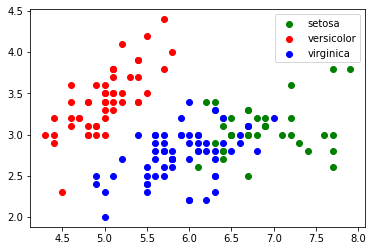

In [10]:
plt.scatter(iris.data[previsoes == 0, 0], iris.data[previsoes == 0, 1], c = 'green', label = 'setosa')
plt.scatter(iris.data[previsoes == 1, 0], iris.data[previsoes == 1, 1], c = 'red', label = 'versicolor')
plt.scatter(iris.data[previsoes == 2, 0], iris.data[previsoes == 2, 1], c = 'blue', label = 'virginica')
plt.legend()
plt.show()

#<font color="orange">C-Means</font>

In [12]:
!pip install scikit-fuzzy

     |████████████████████████████████| 1.0MB 4.1MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-cp37-none-any.whl size=894069 sha256=14916374604a9123f81a2424a2a2b18ccdc80f472f791b85811f6384f27dfa17
  Stored in directory: /root/.cache/pip/wheels/b9/4e/77/da79b16f64ef1738d95486e2731eea09d73e90a72465096600
Successfully built scikit-fuzzy


In [13]:
# Imports
import skfuzzy


Aplicação do algoritmo definindo tres clusters -> (c = 3) e passando a matriz transposta (iris.data.T). Os outros parametros são obrigatorios e são os default indicados na decomposição.

In [14]:
r = skfuzzy.cmeans(data= iris.data.T, c = 3, m= 2, error= 0.005, maxiter= 1000, init= None)

Obtendo as porcentagens de um registro pertencer a um cluster, que esta na posição 1 da matriz retornada

In [15]:
previsoes_porcentagem = r[1]

Visualização da probabilidade de um registro pertencer a cada um dos clusters -> (o somatorio é 1.0 que indica 100%)

In [16]:
for x in range(150):
  print(previsoes_porcentagem[0][x], previsoes_porcentagem[1][x], previsoes_porcentagem[2][x])

0.001071939546019324 0.9966236208636118 0.0023044395903688026
0.0075010511345808524 0.9758401600646976 0.016658788800721577
0.006416588633986089 0.9798178481613912 0.013765563204622659
0.01011160354490806 0.9674110429446082 0.022477353510483848
0.001767901458355145 0.9944700492174265 0.003762049324218209
0.020626779004873027 0.9345475878584854 0.044825633136641535
0.0065066309941700625 0.979483279232074 0.014010089773755924
0.00014126250805762146 0.9995470375919364 0.00031169990000603235
0.021910127991635952 0.9303485421412446 0.047741329867119424
0.0053439149226137015 0.9827136190401434 0.011942466037242734
0.010203963338619223 0.9680307356629255 0.02176530099845518
0.0024322600579498007 0.9921325275397602 0.00543521240228986
0.009180667665519227 0.9706261042679201 0.020193228066560764
0.025243293677491268 0.9229415032685236 0.051815203053985
0.03764089648756075 0.8897283374501942 0.07263076606224499
0.05431977355979876 0.8413017789246244 0.10437844751557683
0.017500138247997257 0.946

Geração de Matriz de Contingencia para comparação com as classes originais da base de dados

In [18]:
previsoes_cmeans = previsoes_porcentagem.argmax(axis= 0)
resultados_cmeans = confusion_matrix(iris.target, previsoes_cmeans)
resultados_cmeans

array([[ 0, 50,  0],
       [ 3,  0, 47],
       [37,  0, 13]])

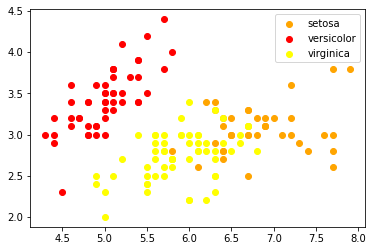

In [20]:
plt.scatter(iris.data[previsoes_cmeans == 0, 0], iris.data[previsoes_cmeans == 0, 1], c = 'orange', label = 'setosa')
plt.scatter(iris.data[previsoes_cmeans == 1, 0], iris.data[previsoes_cmeans == 1, 1], c = 'red', label = 'versicolor')
plt.scatter(iris.data[previsoes_cmeans == 2, 0], iris.data[previsoes_cmeans == 2, 1], c = 'yellow', label = 'virginica')
plt.legend()
plt.show()

#<font color="brown">K-Medoids</font>

In [21]:
!pip install pyclustering

     |████████████████████████████████| 2.6MB 5.6MB/s 
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-cp37-none-any.whl size=2395105 sha256=8358e43d5d8efd7fd6d929362bdf7ae8656fd48e713a0054fe625b4352fc77ee
  Stored in directory: /root/.cache/pip/wheels/d4/98/57/2f53b94ccf47805e95e189e8a18f58a51ff61d67955b79c60d
Successfully built pyclustering


In [22]:
# Imports
from sklearn import datasets
from sklearn.metrics import confusion_matrix
import numpy as np
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.cluster import cluster_visualizer


In [23]:
# carregando a base de dados
iris = datasets.load_iris()

Configuração dos parametros do k-medoids, utilizando somente as duas primeiras colunas da base de dados por causa da visualização apenas 3, 12, e 20 sao indices aleatorios de registros da base de dados (inicialização)

In [24]:
cluster = kmedoids(iris.data[:, 0:2], [3, 12, 20])
# Visualização dos pontos escolhidos (3, 12 e 20)
cluster.get_medoids()

[3, 12, 20]

Aplicação do algoritmo para o agrupamento, obtenção da previsão (grupo de cada registro) e visualização dos medoides

In [26]:
cluster.process()
previsoes = cluster.get_clusters()
medoides = cluster.get_medoids()
# lista de 3 elementos, com os indices dos registros do cluster
#previsoes

Visualização do agrupamento

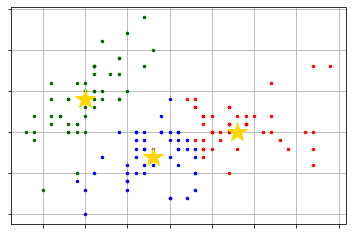

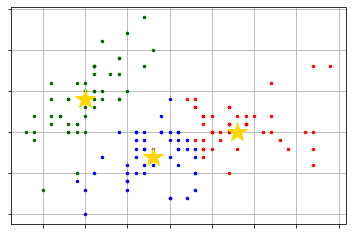

In [34]:
v = cluster_visualizer()
v.append_clusters(previsoes, iris.data[:,0:2])
v.append_cluster(medoides, data = iris.data[:,0:2], marker = '*', markersize = 20)
v.show()

Codigo para criar duas listas, uma com os grupos reais da base de dados e outra com os valores dos grupos, utilizado posteriormente para visualização da matriz de contingencia.

In [32]:
lista_previsoes = []
lista_real = []
for i in range(len(previsoes)):
     for j in range(len(previsoes[i])):
        lista_previsoes.append(i)
        lista_real.append(iris.target[previsoes[i][j]])

Geração da matriz de contingência, comparando os grupos reais com os grupos previstos

In [33]:
lista_previsoes = np.asarray(lista_previsoes)
lista_real = np.asarray(lista_real)
resultados = confusion_matrix(lista_real, lista_previsoes)
resultados

array([[ 0,  0, 50],
       [12, 38,  0],
       [35, 14,  1]])